### Importing Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
import shap
from lightgbm import LGBMClassifier

### Reading the Data

In [6]:
df = pd.read_csv('student_job_fair_data.csv', nrows=2000)

### Data Manipulation

In [7]:
df.head()

,student_id,skills,experience_years,course_grades,projects_completed,extracurriculars,job_offer
0,1,Python;Data Analysis;SQL,3,75.26,9,0,1
1,2,Java,4,74.25,6,2,1
2,3,Data Analysis,2,74.89,4,3,0
3,4,Data Analysis,4,72.73,2,3,1
4,5,Machine Learning;Python;C++,4,84.85,1,4,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          2000 non-null   int64  
 1   skills              2000 non-null   object 
 2   experience_years    2000 non-null   int64  
 3   course_grades       2000 non-null   float64
 4   projects_completed  2000 non-null   int64  
 5   extracurriculars    2000 non-null   int64  
 6   job_offer           2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB


In [9]:
df.describe()

,student_id,experience_years,course_grades,projects_completed,extracurriculars,job_offer
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2.478500,79.976165,4.620000,1.995500,0.499000
std,577.494589,1.721342,11.663924,2.870491,1.397661,0.500124
min,1.000000,0.000000,60.020000,0.000000,0.000000,0.000000
25%,500.750000,1.000000,69.667500,2.000000,1.000000,0.000000
50%,1000.500000,2.000000,79.695000,5.000000,2.000000,0.000000
75%,1500.250000,4.000000,90.545000,7.000000,3.000000,1.000000
max,2000.000000,5.000000,99.990000,9.000000,4.000000,1.000000


In [10]:
df.corr()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14700\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,student_id,experience_years,course_grades,projects_completed,extracurriculars,job_offer
student_id,1.000000,-0.000803,0.010168,-0.053255,-0.000482,-0.007730
experience_years,-0.000803,1.000000,0.011807,0.003104,0.034164,-0.034019
course_grades,0.010168,0.011807,1.000000,-0.030829,-0.039397,0.052407
projects_completed,-0.053255,0.003104,-0.030829,1.000000,0.041843,-0.006537
extracurriculars,-0.000482,0.034164,-0.039397,0.041843,1.000000,-0.049029
job_offer,-0.007730,-0.034019,0.052407,-0.006537,-0.049029,1.000000


In [11]:
df['job_offer'].value_counts()

0    1002
1     998
Name: job_offer, dtype: int64

In [12]:
df['course_grades'].nunique()

1595

### Data Visualization

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14700\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

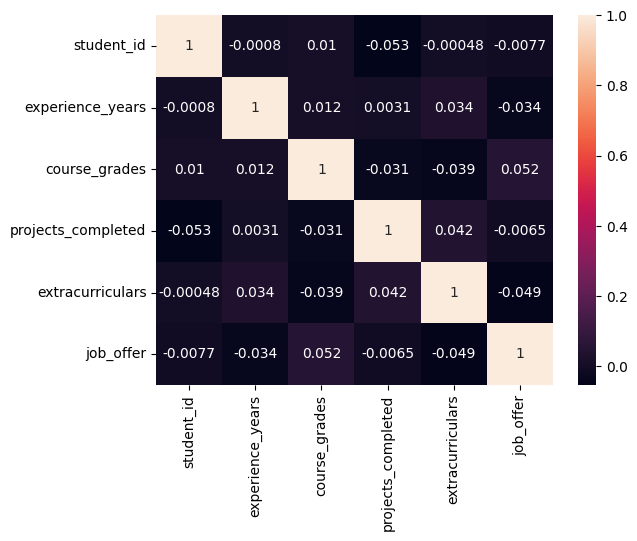

In [13]:
sns.heatmap(df.corr(), annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c68bec7210>,
 'caps': [<matplotlib.lines.Line2D at 0x1c68bef4690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c68b9ef790>],
 'medians': [<matplotlib.lines.Line2D at 0x1c68bef57d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c68ba7f110>],
 'means': []}

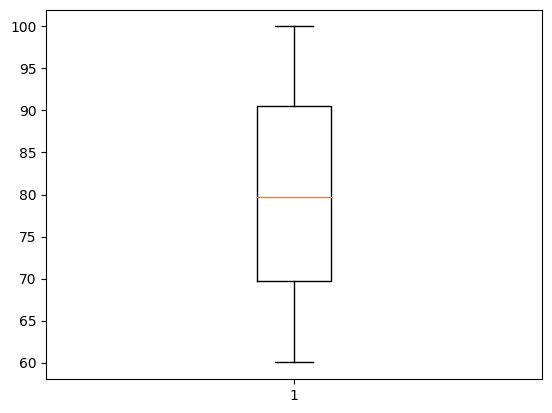

In [17]:
plt.boxplot(df['course_grades'])

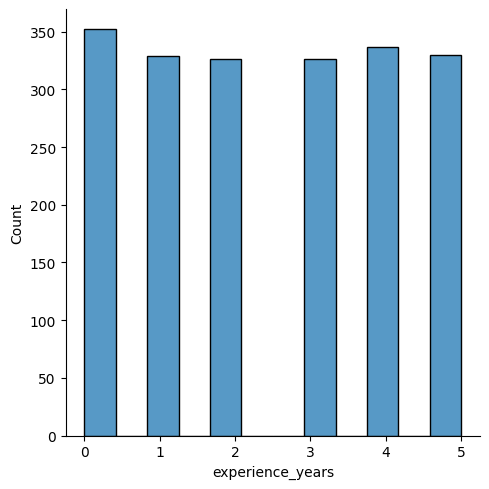

In [18]:
sns.displot(df['experience_years'])

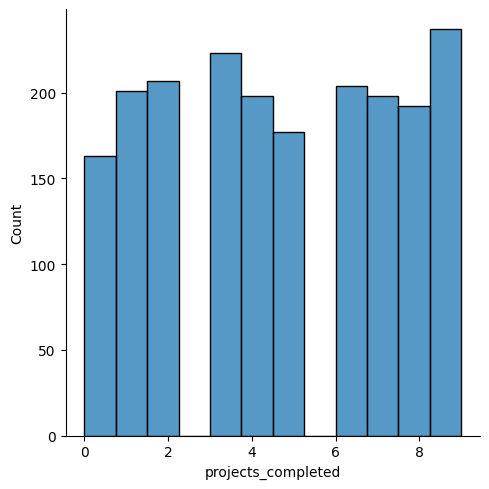

In [19]:
sns.displot(df['projects_completed'])

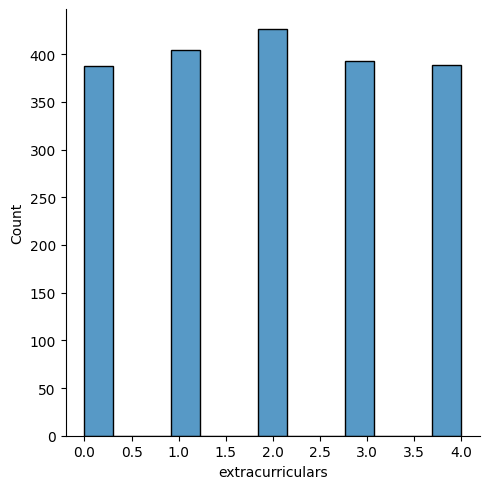

In [20]:
sns.displot(df['extracurriculars'])

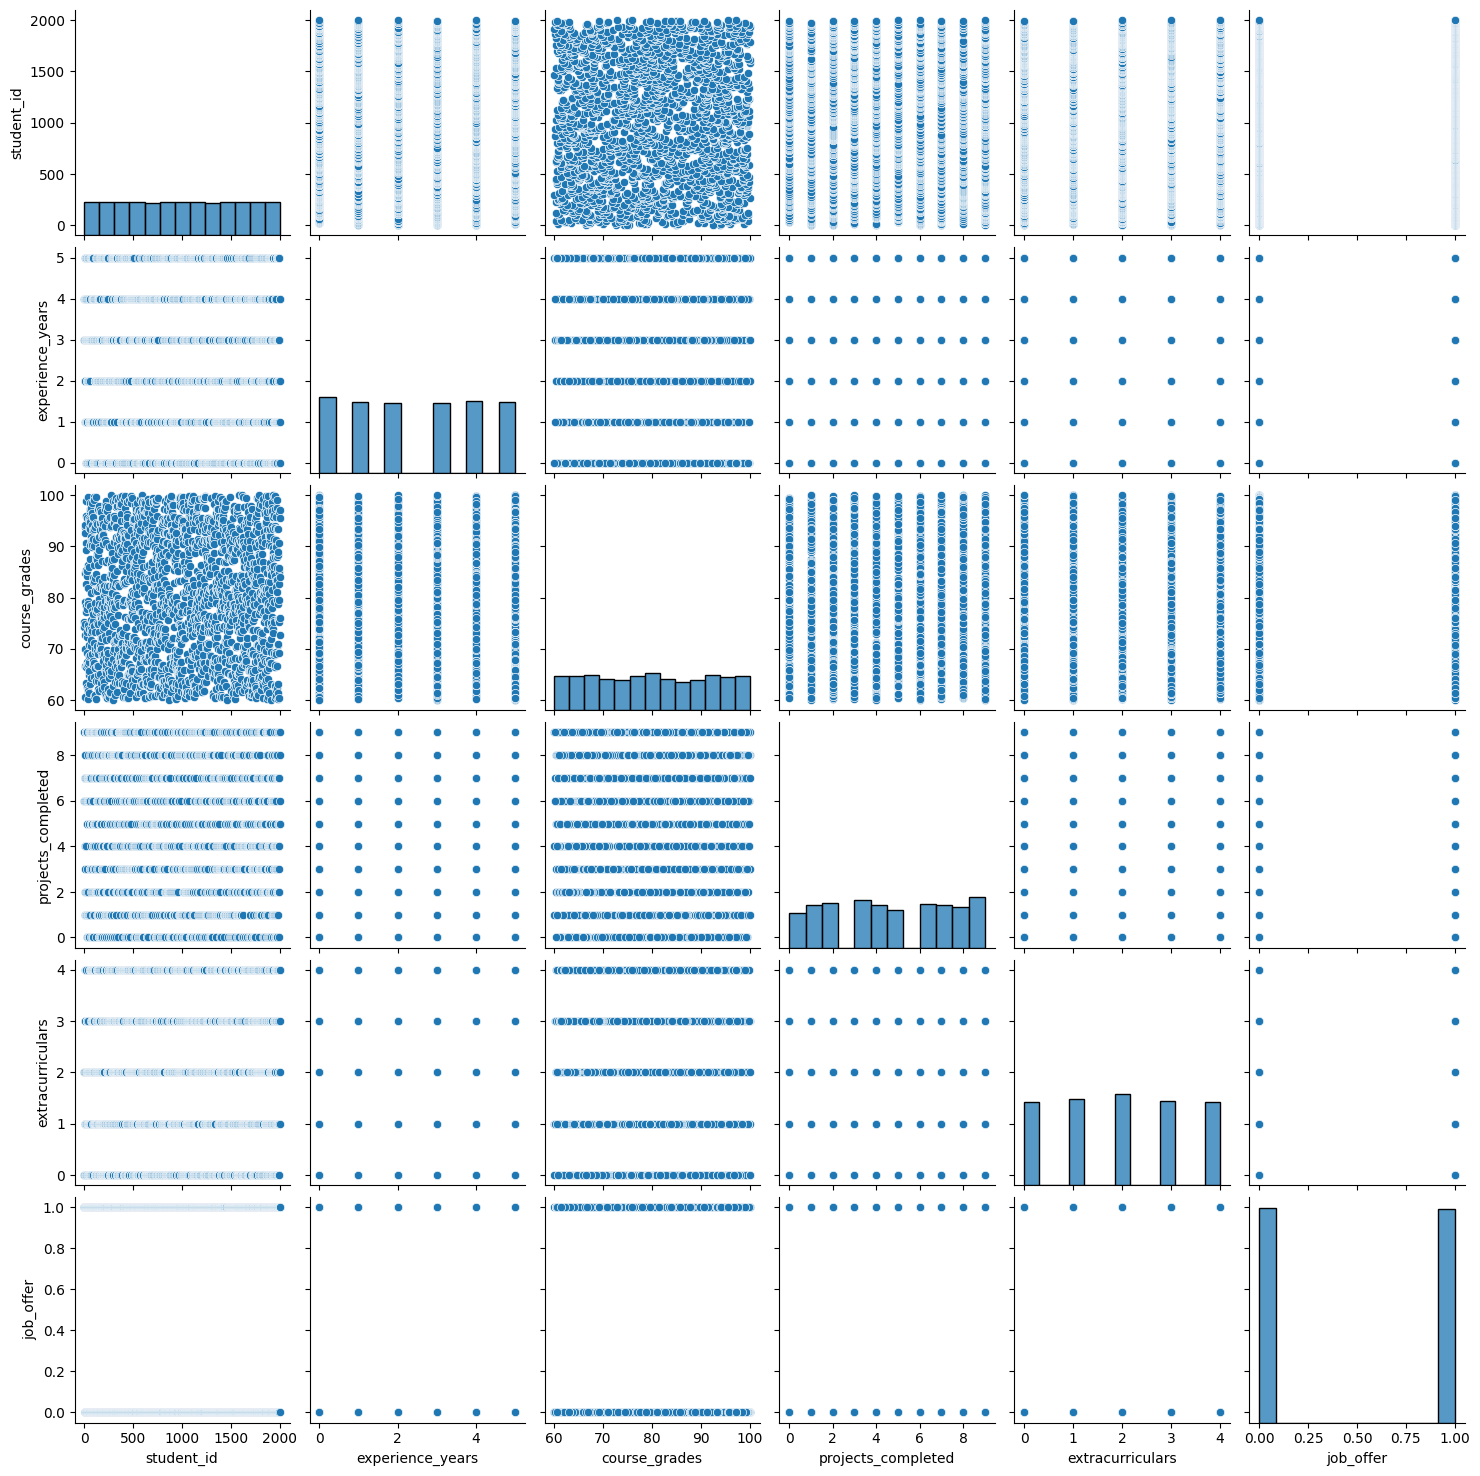

In [21]:
sns.pairplot(df)

Text(0.5, 0, 'number of projects completed')

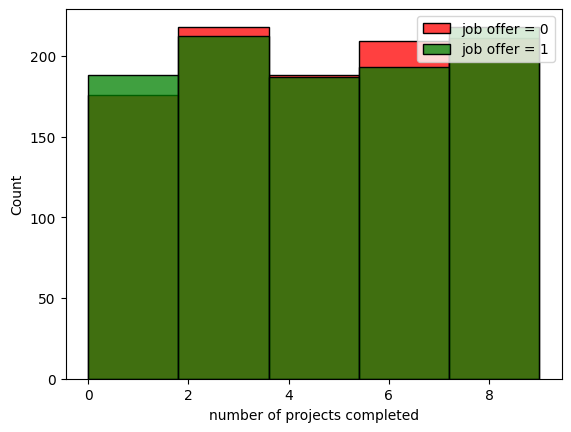

In [22]:
sns.histplot(df[df['job_offer']==0]['projects_completed'],bins=5,kde=False,color='red',label='job offer = 0')
sns.histplot(df[df['job_offer']==1]['projects_completed'],bins=5,kde=False,color='green',label='job offer = 1')
plt.legend(loc=1)
plt.xlabel('number of projects completed')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14700\46398115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['job_offer'].sort_values()[:-1].plot(kind='bar')


<Axes: >

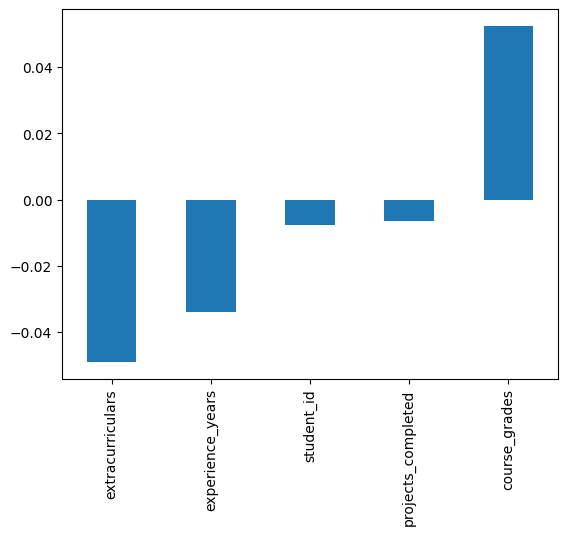

In [23]:
df.corr()['job_offer'].sort_values()[:-1].plot(kind='bar')

### Data Preprocessing

In [24]:
df.drop(columns=['student_id'], inplace=True)

In [25]:
encoder = LabelEncoder()

In [26]:
df['skills'] = encoder.fit_transform(df['skills'])

In [27]:
df.head()

,skills,experience_years,course_grades,projects_completed,extracurriculars,job_offer
0,114,3,75.26,9,0,1
1,52,4,74.25,6,2,1
2,26,2,74.89,4,3,0
3,26,4,72.73,2,3,1
4,95,4,84.85,1,4,0


In [28]:
x = df.drop(columns=['job_offer'])
y = df['job_offer']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

### Modeling

In [33]:
lr = LogisticRegression()

In [34]:
lr.fit(x_train, y_train)

LogisticRegression()

In [35]:
lr.score(x_test, y_test)

0.535

In [36]:
scaler = StandardScaler()

In [37]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [38]:
lrs = LogisticRegression()

In [39]:
lrs.fit(x_train_scaled, y_train)

LogisticRegression()

In [40]:
lrs.score(x_test_scaled, y_test)

0.54

In [63]:
lrs.score(x_train_scaled, y_train)

0.541875

In [41]:
y_pred = lrs.predict(x_test_scaled)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54       207
           1       0.52      0.55      0.54       193

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.54      0.54      0.54       400



In [43]:
print(confusion_matrix(y_test, y_pred))

[[110  97]
 [ 87 106]]


In [44]:
accuracy_score(y_test, y_pred)

0.54

In [46]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
print(cross_val_score(LogisticRegression(), x, y, cv=cv))
round(np.max(cross_val_score(LogisticRegression(), x, y, cv=cv)), 2) *100

[0.535  0.505  0.525  0.5675 0.535 ]


56.99999999999999

In [47]:
x_scaled = scaler.fit_transform(x)

In [48]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
print(cross_val_score(LogisticRegression(), x_scaled, y, cv=cv))
round(np.max(cross_val_score(LogisticRegression(), x_scaled, y, cv=cv)), 2) *100

[0.535  0.505  0.525  0.5675 0.535 ]


56.99999999999999

In [49]:
ds = DecisionTreeClassifier()

In [50]:
ds.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
ds.score(x_test, y_test)

0.5225

In [52]:
params_ds = {
    'max_depth':[10,12,14,15,16, 18, 20, 22, 24],
            'min_samples_split':[5,10,20,25,30,35],
            'criterion' : ['gini', 'entropy', 'log_loss'],
            'splitter' : ['best', 'random']
}

In [53]:
dtree = DecisionTreeClassifier()

In [54]:
gs_ds = GridSearchCV(dtree, params_ds, cv=5)

In [55]:
gs_ds.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 12, 14, 15, 16, 18, 20, 22, 24],
                         'min_samples_split': [5, 10, 20, 25, 30, 35],
                         'splitter': ['best', 'random']})

In [56]:
gs_ds.best_params_

{'criterion': 'entropy',
 'max_depth': 22,
 'min_samples_split': 20,
 'splitter': 'random'}

In [57]:
gs_ds.best_score_

0.529375

In [58]:
ds_gs = DecisionTreeClassifier(criterion='entropy', max_depth=22, min_samples_split=20, splitter='random')

In [59]:
ds_gs.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=22, min_samples_split=20,
                       splitter='random')

In [61]:
ds_gs.score(x_test_scaled, y_test)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.52

In [62]:
ds_gs.score(x_train_scaled, y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4925

In [65]:
rf = RandomForestClassifier(n_estimators=70)

In [70]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=70)

In [71]:
rf.score(x_test, y_test)

0.515

In [106]:
rf.feature_importances_

array([0.28106234, 0.11506619, 0.36372121, 0.14905701, 0.09109326])

In [72]:
ad = AdaBoostClassifier()

In [73]:
ad.fit(x_train, y_train)

AdaBoostClassifier()

In [76]:
ad.score(x_test, y_test)

0.5225

In [77]:
cat = CatBoostClassifier()

In [78]:
cat.fit(x_train, y_train)

Learning rate set to 0.012592
0:	learn: 0.6926824	total: 129ms	remaining: 2m 8s
1:	learn: 0.6924050	total: 132ms	remaining: 1m 5s
2:	learn: 0.6921070	total: 148ms	remaining: 49.2s
3:	learn: 0.6918389	total: 151ms	remaining: 37.5s
4:	learn: 0.6916015	total: 166ms	remaining: 33.1s
5:	learn: 0.6910905	total: 195ms	remaining: 32.3s
6:	learn: 0.6908038	total: 197ms	remaining: 27.9s
7:	learn: 0.6904730	total: 199ms	remaining: 24.7s
8:	learn: 0.6900013	total: 201ms	remaining: 22.1s
9:	learn: 0.6895709	total: 205ms	remaining: 20.3s
10:	learn: 0.6892603	total: 207ms	remaining: 18.6s
11:	learn: 0.6889149	total: 209ms	remaining: 17.2s
12:	learn: 0.6886123	total: 212ms	remaining: 16.1s
13:	learn: 0.6883366	total: 214ms	remaining: 15s
14:	learn: 0.6881049	total: 216ms	remaining: 14.2s
15:	learn: 0.6879375	total: 218ms	remaining: 13.4s
16:	learn: 0.6875481	total: 221ms	remaining: 12.8s
17:	learn: 0.6871579	total: 224ms	remaining: 12.2s
18:	learn: 0.6867471	total: 226ms	remaining: 11.7s
19:	learn: 0.

In [79]:
cat.score(x_test, y_test)

0.535

In [80]:
gr = GradientBoostingClassifier()

In [81]:
gr.fit(x_train, y_train)

GradientBoostingClassifier()

In [82]:
gr.score(x_test, y_test)

0.49

In [83]:
xg = XGBClassifier()

In [84]:
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [85]:
xg.score(x_test, y_test)

0.5225

In [86]:
gn = GaussianNB()

In [87]:
gn.fit(x_train, y_train)

GaussianNB()

In [88]:
gn.score(x_test, y_test)

0.5275

In [89]:
sv = SVC()

In [90]:
sv.fit(x_train, y_train)

SVC()

In [91]:
sv.score(x_test, y_test)

0.4975

In [92]:
kn = KNeighborsClassifier()

In [93]:
kn.fit(x_train, y_train)

KNeighborsClassifier()

In [94]:
kn.score(x_test, y_test)

0.4925

In [96]:
poly = PolynomialFeatures(degree=3)

In [97]:
x_poly = poly.fit_transform(x)
x = pd.DataFrame(x_poly)

In [98]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,114.0,3.0,75.26,9.0,0.0,12996.0,342.0,8579.64,1026.0,...,9.0,225.78,27.0,0.0,5664.0676,677.34,0.00,81.0,0.0,0.0
1,1.0,52.0,4.0,74.25,6.0,2.0,2704.0,208.0,3861.00,312.0,...,16.0,297.00,24.0,8.0,5513.0625,445.50,148.50,36.0,12.0,4.0
2,1.0,26.0,2.0,74.89,4.0,3.0,676.0,52.0,1947.14,104.0,...,4.0,149.78,8.0,6.0,5608.5121,299.56,224.67,16.0,12.0,9.0
3,1.0,26.0,4.0,72.73,2.0,3.0,676.0,104.0,1890.98,52.0,...,16.0,290.92,8.0,12.0,5289.6529,145.46,218.19,4.0,6.0,9.0
4,1.0,95.0,4.0,84.85,1.0,4.0,9025.0,380.0,8060.75,95.0,...,16.0,339.40,4.0,16.0,7199.5225,84.85,339.40,1.0,4.0,16.0


In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [100]:
lr = LogisticRegression()

In [101]:
lr.fit(x_train, y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
lr.score(x_test, y_test)

0.525

In [103]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [104]:
lr.fit(x_train_scaled, y_train)

LogisticRegression()

In [105]:
lr.score(x_test_scaled, y_test)

0.535

In [118]:
model = Sequential()

In [119]:
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [120]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [121]:
model.fit(x=x_train, y=y_train, epochs=200, verbose=1)

Epoch 1/200
50/50 [==============================] - 1s 4ms/step - loss: 516.5471 - accuracy: 0.5150
Epoch 2/200
50/50 [==============================] - 0s 2ms/step - loss: 229.3759 - accuracy: 0.5075
Epoch 3/200
50/50 [==============================] - 0s 2ms/step - loss: 93.1558 - accuracy: 0.5050
Epoch 4/200
50/50 [==============================] - 0s 1ms/step - loss: 33.0751 - accuracy: 0.5063
Epoch 5/200
50/50 [==============================] - 0s 1ms/step - loss: 7.5340 - accuracy: 0.5050
Epoch 6/200
50/50 [==============================] - 0s 1ms/step - loss: 1.4042 - accuracy: 0.4888
Epoch 7/200
50/50 [==============================] - 0s 2ms/step - loss: 0.8435 - accuracy: 0.5006
Epoch 8/200
50/50 [==============================] - 0s 1ms/step - loss: 0.7502 - accuracy: 0.4981
Epoch 9/200
50/50 [==============================] - 0s 2ms/step - loss: 0.7348 - accuracy: 0.5000
Epoch 10/200
50/50 [==============================] - 0s 1ms/step - loss: 0.7099 - accuracy: 0.4956
Epo

In [122]:
model_df = pd.DataFrame(model.history.history)
model_df.head()

,loss,accuracy
0,516.547058,0.51500
1,229.375916,0.50750
2,93.155762,0.50500
3,33.075142,0.50625
4,7.534038,0.50500


<Axes: >

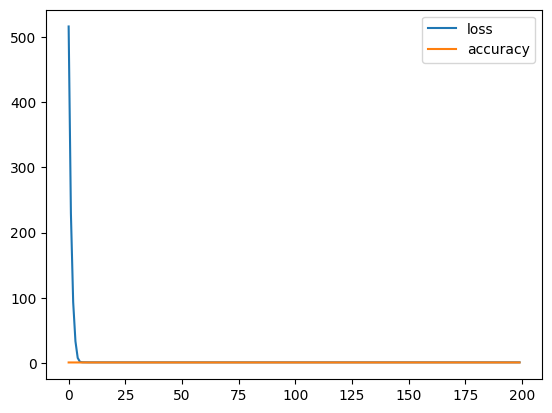

In [123]:
model_df.plot()

### applying new model

In [107]:
df2 = pd.read_csv('student_job_fair_data.csv', nrows=2000)

In [108]:
df2.drop(columns=['student_id'], inplace=True)

In [109]:
x2 = df2.drop(columns=['job_offer'])
y2 = df2['job_offer']

In [110]:
fetures = x.columns

In [111]:
cat_features = []
for cat in x2.select_dtypes(exclude="number"):
    cat_features.append(cat)
    x2[cat] = x2[cat].astype("category").cat.codes.astype("category")

In [112]:
x2_train, x2_val, y2_train, y2_val = train_test_split(x2,y2,train_size=0.2, random_state=42)

In [113]:
clf = LGBMClassifier(max_depth=3, n_estimators=1000, objective="binary")
clf.fit(x2_train,y2_train, eval_set=(x2_val,y2_val)) 

[LightGBM] [Info] Number of positive: 195, number of negative: 205
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487500 -> initscore=-0.050010
[LightGBM] [Info] Start training from score -0.050010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(max_depth=3, n_estimators=1000, objective='binary')

In [116]:
clf.score(x2_val, y2_val)

0.494375

In [114]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x2_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


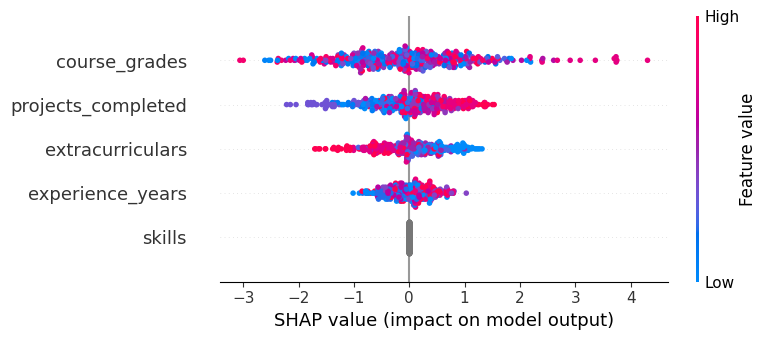

In [115]:
shap.summary_plot(shap_values, x2_train)

### applying different encoding technique

In [126]:
df3 = pd.read_csv('student_job_fair_data.csv', nrows=2000)

In [127]:
df3.drop(columns=['student_id'], inplace=True)

In [128]:
cpp_list = []
for i in df3['skills']:
    if 'C++' in i:
        cpp_list.append(1)
    else:
        cpp_list.append(0)
#----------------------------------------
ml_list = []
for i in df3['skills']:
    if 'Machine Learning' in i:
        ml_list.append(1)
    else:
        ml_list.append(0)
#----------------------------------------
java_list = []
for i in df3['skills']:
    if 'Java' in i:
        java_list.append(1)
    else:
        java_list.append(0)
#----------------------------------------
sql_list = []
for i in df3['skills']:
    if 'SQL' in i:
        sql_list.append(1)
    else:
        sql_list.append(0)
#----------------------------------------
da_list = []
for i in df3['skills']:
    if 'Data Analysis' in i:
        da_list.append(1)
    else:
        da_list.append(0)
#----------------------------------------
py_list = []
for i in df3['skills']:
    if 'Python' in i:
        py_list.append(1)
    else:
        py_list.append(0)

In [129]:
df3.insert(3, 'Python', py_list, True)
df3.insert(4, 'Data Analysis', da_list, True)
df3.insert(5, 'Machine Learning', ml_list, True)
df3.insert(6, 'SQL', sql_list, True)
df3.insert(7, 'C++', cpp_list, True)
df3.insert(8, 'Java', java_list, True)

In [130]:
df3.head()

,skills,experience_years,course_grades,Python,Data Analysis,Machine Learning,SQL,C++,Java,projects_completed,extracurriculars,job_offer
0,Python;Data Analysis;SQL,3,75.26,1,1,0,1,0,0,9,0,1
1,Java,4,74.25,0,0,0,0,0,1,6,2,1
2,Data Analysis,2,74.89,0,1,0,0,0,0,4,3,0
3,Data Analysis,4,72.73,0,1,0,0,0,0,2,3,1
4,Machine Learning;Python;C++,4,84.85,1,0,1,0,1,0,1,4,0


In [131]:
df3.drop(columns=['skills'], inplace=True)

In [132]:
x3 = df3.drop(columns=['job_offer'])
y3 = df3['job_offer']

In [133]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

In [134]:
lr3 = LogisticRegression()

In [135]:
lr3.fit(x3_train, y3_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
lr3.score(x3_test, y3_test)

0.545

In [137]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
print(cross_val_score(LogisticRegression(), x3, y3, cv=cv))
round(np.max(cross_val_score(LogisticRegression(), x3, y3, cv=cv)), 2) *100

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

[0.545  0.4925 0.515  0.53   0.5075]


55.00000000000001